In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'Rotten Tomatoes Movies.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [5]:
# Data Cleaning
# Drop columns with excessive missing values
data_cleaned = data.drop(columns=['critics_consensus'])

In [13]:
# Convert dates to datetime format
data_cleaned['in_theaters_date'] = pd.to_datetime(data_cleaned['in_theaters_date'], errors='coerce')
data_cleaned['on_streaming_date'] = pd.to_datetime(data_cleaned['on_streaming_date'], errors='coerce')

In [15]:
# Remove potential outliers in 'runtime_in_minutes' (e.g., movies with over 300 minutes)
data_cleaned = data_cleaned[data_cleaned['runtime_in_minutes'] <= 300]

In [31]:
# Visualization
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

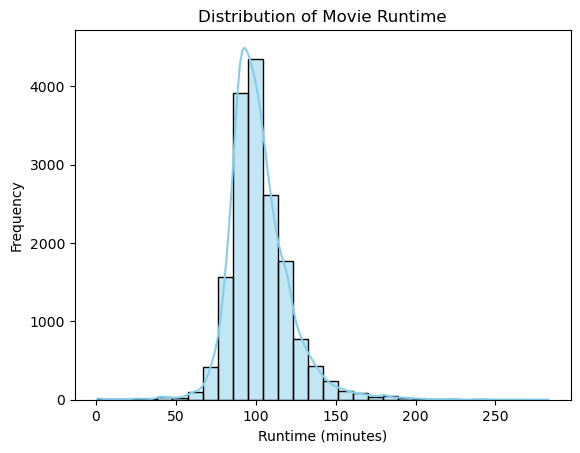

In [45]:
# 1. Distribution of movie runtime
sns.histplot(data_cleaned['runtime_in_minutes'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_13964\2245702402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')


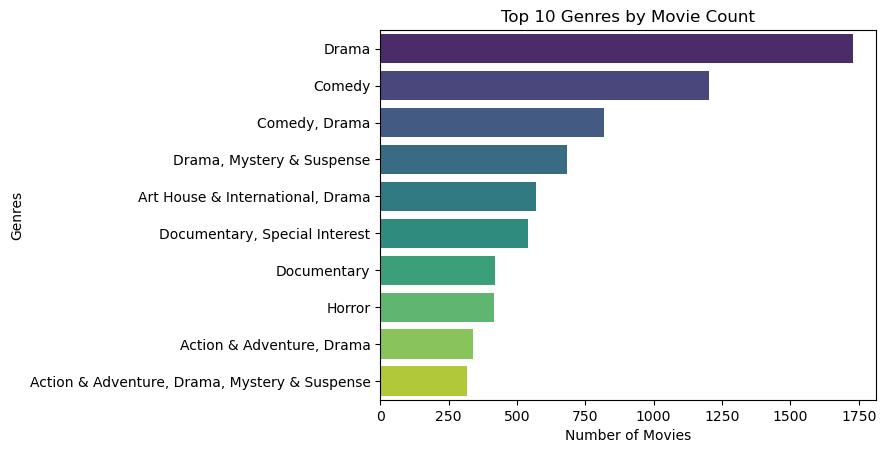

In [43]:
# 2. Genre distribution
top_genres = data_cleaned['genre'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

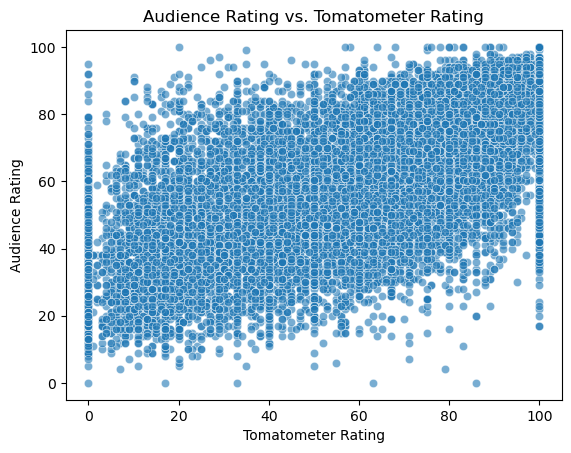

In [41]:
# 3. Audience Rating vs. Tomatometer Rating
sns.scatterplot(data=data_cleaned, x='tomatometer_rating', y='audience_rating', alpha=0.6)
plt.title('Audience Rating vs. Tomatometer Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_13964\852146685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rating_counts.index, x=rating_counts.values, palette='coolwarm')


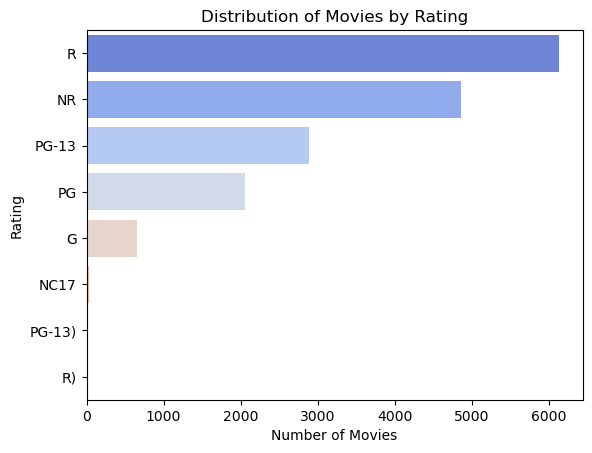

In [47]:
# 4. Distribution of movies by rating
rating_counts = data_cleaned['rating'].value_counts()
sns.barplot(y=rating_counts.index, x=rating_counts.values, palette='coolwarm')
plt.title('Distribution of Movies by Rating')
plt.xlabel('Number of Movies')
plt.ylabel('Rating')
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_13964\3148526301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_audience_by_status.index, y=avg_audience_by_status.values, palette='magma')


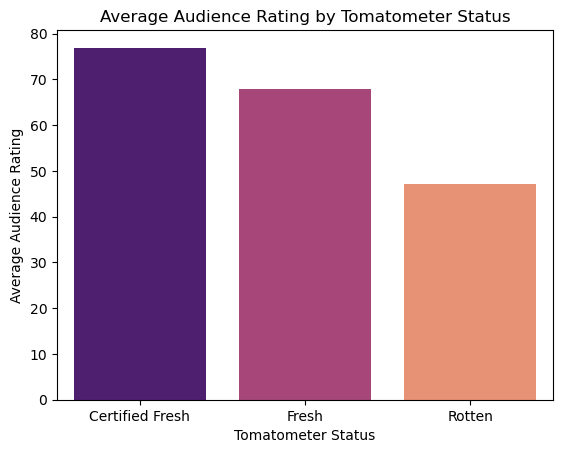

In [49]:
# 5. Average audience rating by tomatometer status
avg_audience_by_status = data_cleaned.groupby('tomatometer_status')['audience_rating'].mean()
sns.barplot(x=avg_audience_by_status.index, y=avg_audience_by_status.values, palette='magma')
plt.title('Average Audience Rating by Tomatometer Status')
plt.xlabel('Tomatometer Status')
plt.ylabel('Average Audience Rating')
plt.show()

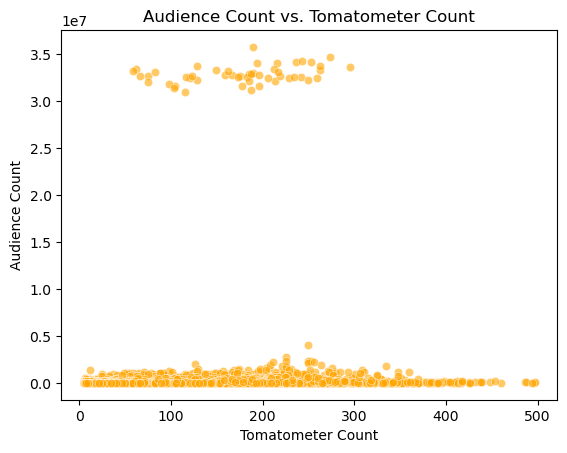

In [51]:
# 6. Audience Count vs. Tomatometer Count
sns.scatterplot(data=data_cleaned, x='tomatometer_count', y='audience_count', alpha=0.6, color='orange')
plt.title('Audience Count vs. Tomatometer Count')
plt.xlabel('Tomatometer Count')
plt.ylabel('Audience Count')
plt.show()

                                                    Conclusion
Runtime: Most movies are 80–120 minutes long.
Genres: "Action & Adventure," "Comedy," and "Drama" are the most popular genres.
Ratings: "PG-13" and "R" dominate the movie rating distribution.
Critic vs. Audience: Higher-rated movies ("Certified Fresh") align with audience preferences.
Trends: Popular movies attract both high audience and critic engagement.